# 🧠 Step-by-Step Single Neuron Computation with Sigmoid Activation

In this notebook, we walk through how a **single neuron** computes its output given:
- A list of input values
- A list of weights (one for each input)
- A bias term

We'll use the **sigmoid activation function** to produce the final output.

The formula for the output is:
\begin{align}
z &= \sum (x_i \cdot w_i) + b \\
a &= \sigma(z) = \frac{1}{1 + e^{-z}}
\end{align}

In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from math import exp


---
### 🧠 The activation function
We define the sigmoid activation function, which is one of the most commonly used nonlinear functions in neural networks.

Mathematically, it's defined as:
\begin{align}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{align}
This function maps any real-valued input into a value between 0 and 1.

In [11]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + exp(-z))

### 🔍 How to interpret it?
The sigmoid function is often used in the output layer of a binary classification neuron because it gives a smooth probability-like result:

- If z is a large positive number → sigmoid(z) approaches 1
- If z is a large negative number → sigmoid(z) approaches 0
- If z is 0 → sigmoid(0) is 0.5, the midpoint

This behavior makes it great for decisions where the output can be interpreted as a confidence or likelihood.

---
### 🧠 Core components of a neuron
In this step, we define the core components of a neuron:
- inputs: the values that enter the neuron (think of these as features of a data point)
- weights: the importance each input has in influencing the final output
- bias: a trainable constant added to the weighted sum, allowing flexibility in shifting the activation function.
These are the values the neuron will use to compute its output.

In [20]:
# Define inputs, weights, and bias
inputs = [1, 0, 0]  # Input vector (x1, x2, x3)
weights = [1, 0, 0]  # Corresponding weights (w1, w2, w3)
bias = 0  # Bias term (b)
print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")

Inputs: [1, 0, 0]
Weights: [1, 0, 0]
Bias: 0


### 🔍 How to interpret it?
This setup describes a single artificial neuron with 3 inputs:
- The neuron will multiply each input by its corresponding weight.
- Then it will sum all these products and add the bias.
- Finally, the result will be passed through the activation function (like sigmoid) to produce an output between 0 and 1.
This is the foundational computation that drives more complex neural networks.

---
### 🧮 Weighted Input Sum
Now we compute the **weighted sum (z)** of the inputs:
\begin{align}
 z = x_1 \cdot w_1 + x_2 \cdot w_2 + x_3 \cdot w_3 + b
\end{align}
This is the **linear combination** of inputs and weights, plus the bias term. It's the input to the activation function.

In [21]:
# Step-by-step calculation of weighted sum
weighted_sum = sum(x * w for x, w in zip(inputs, weights)) + bias
print(f"Weighted sum (z): {weighted_sum:.4f}")

Weighted sum (z): 1.0000



### 📊 How to interpret it?

This value `z` tells us how "strong" the signal is before it's passed through the activation function.

- If `z` is large and positive → the neuron is strongly activated.
- If `z` is near zero → the neuron is uncertain.
- If `z` is negative → the neuron is likely deactivated.

We'll now pass this value through **sigmoid** to squash it into the [0, 1] range.

Here's the markdown explanation to surround your last code block:

---

### 🧠 Output Computation

This step applies the **sigmoid activation function** to the weighted sum:

\begin{align}
a &= \sigma(z) = \frac{1}{1 + e^{-z}}
\end{align}

The sigmoid function converts the raw output (`z`) into a value between 0 and 1 — representing a probability or confidence.

In [22]:
# Compute activated output
output = sigmoid(weighted_sum)
print(f"Activated output (a): {output:.4f}")

Activated output (a): 0.7311


### 📈 How to interpret it?

- If `a` is close to **1**, the neuron "fires" — indicating a strong match.
- If `a` is near **0**, the neuron is "off" — no activation.
- Values near **0.5** represent **uncertainty**.

This final output is what the neuron returns — it’s the prediction, classification score, or signal to pass forward in a neural network.

---
### 📊 Vizualization
This chart visually shows the sigmoid activation function over a range of input values z, highlighting:
- The input to the neuron (z, in red dashed line)
- The activated output (a = sigmoid(z), in green dashed line)
This helps you understand where on the sigmoid curve your neuron's current output lies.

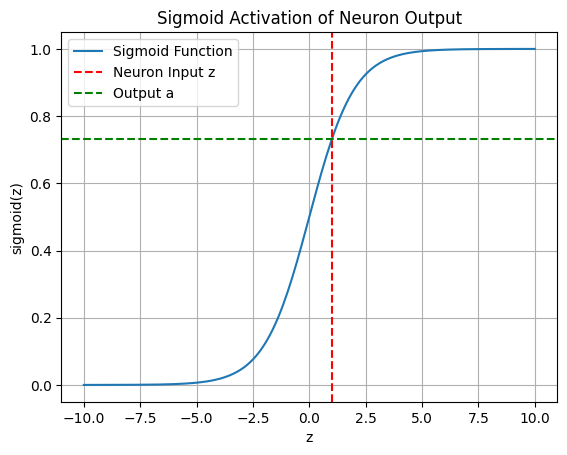

In [23]:
# Visualization
z_values = np.linspace(-10, 10, 200)
sigmoid_values = [sigmoid(z) for z in z_values]

plt.plot(z_values, sigmoid_values, label='Sigmoid Function')
plt.axvline(weighted_sum, color='red', linestyle='--', label='Neuron Input z')
plt.axhline(output, color='green', linestyle='--', label='Output a')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Activation of Neuron Output')
plt.grid(True)
plt.legend()
plt.show()

### 🧩 How to interpret it?
- The sigmoid curve shows how values of z are mapped to outputs between 0 and 1.
- The red vertical line marks our current neuron's input (z = weighted_sum).
- The green horizontal line shows the corresponding output (a = sigmoid(z)).